In [1]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Created wheel for pandas-profiling: filename=pandas_profiling-2.9.0-py2.py3-none-any.whl size=258957 sha256=3592811be1ad19e59b0445c5320c79f59a700219ac2519d410c02c83b9072b37
  Stored in directory: C:\Users\Admin\AppData\Local\Temp\pip-ephem-wheel-cache-q9qpof1g\wheels\cc\d5\09\083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
Successfully built pandas-profiling
  Attempting uninstall: visions
    Found existing installation: visions 0.4.4
    Uninstalling visions-0.4.4:
      Successfully uninstalled visions-0.4.4
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.10.0
    Uninstalling seaborn-0.10.0:
      Successfully uninstalled seaborn-0.10.0
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 2.8.0
    Uninstalling pandas-profiling-2.8.0:
      Successfully uninstalled pandas-profiling-2.8.0
Note: you may need to restart the kernel to use updated packages.


In [5]:
#import neccesary libraries
import numpy as np
import pandas as pd
import plotly.offline as po
import plotly.graph_objs as go
%matplotlib inline 
import seaborn as sns
import pandas_profiling 


In [5]:
 pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
open("churn.csv")

<_io.TextIOWrapper name='churn.csv' mode='r' encoding='cp1252'>

In [8]:
import os; print(os.getcwd())


C:\Users\Admin


In [15]:
pwd

'C:\\Users\\Admin'

In [18]:
cd/C:/Xampp/Anaconda3/Lib/Site-packages/Pandas/io/_pycharm_


[WinError 123] The filename, directory name, or volume label syntax is incorrect: '/C:/Xampp/Anaconda3/Lib/Site-packages/Pandas/io/_pycharm_'
C:\Users\Admin


In [31]:
import csv


with open('C:\\Users\\Admin\\churn.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        print(row)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
['1', '15634602', 'Hargrave', '619', 'France', 'Female', '42', '2', '0', '1', '1', '1', '101348.88', '1']
['2', '15647311', 'Hill', '608', 'Spain', 'Female', '41', '1', '83807.86', '1', '0', '1', '112542.58', '0']
['3', '15619304', 'Onio', '502', 'France', 'Female', '42', '8', '159660.8', '3', '1', '0', '113931.57', '1']
['4', '15701354', 'Boni', '699', 'France', 'Female', '39', '1', '0', '2', '0', '0', '93826.63', '0']
['5', '15737888', 'Mitchell', '850', 'Spain', 'Female', '43', '2', '125510.82', '1', '1', '1', '79084.1', '0']
['6', '15574012', 'Chu', '645', 'Spain', 'Male', '44', '8', '113755.78', '2', '1', '0', '149756.71', '1']
['7', '15592531', 'Bartlett', '822', 'France', 'Male', '50', '7', '0', '2', '1', '1', '10062.8', '0']
['8', '15656148', 'Obinna', '376', 'Germany', 'Female', '29', '4', '115046.

In [33]:
df=pd.read_csv("churn.csv",delimiter=",")


In [35]:
pandas_profiling.ProfileReportpd

In [44]:
churn_dataset=pd.read_csv( "C:\\Users\\Admin\\churn.csv


In [37]:
#number of columns and rows in the dataset
churn_dataset.shape

(10000, 14)

In [45]:
columns = churn_dataset.columns.values.tolist()
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


In [46]:
dataset = churn_dataset.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [47]:
dataset =  dataset.drop(['Geography', 'Gender'], axis=1)

In [48]:
Geography = pd.get_dummies(churn_dataset.Geography).iloc[:,1:]
Gender = pd.get_dummies(churn_dataset.Gender).iloc[:,1:]

In [49]:
dataset = pd.concat([dataset,Geography,Gender], axis=1)

In [50]:
X =  dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [52]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)

In [53]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635


<AxesSubplot:>

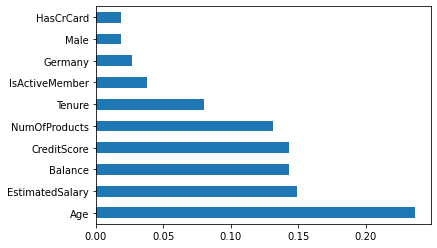

In [54]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')